In [1]:
from ultralytics import YOLO
import cv2
import math 
# start webcam
cap = cv2.VideoCapture(0)
cap.set(3, 640)
cap.set(4, 480)

# model
model = YOLO("runs/detect/train/weights/best.pt")

# object classes
classNames = ['Plastic', 'Styrofoam' ,'general' ,'glass', 'metal' ,'paper', 'vinyl']


while True:
    success, img = cap.read()
    results = model(img, stream=True)

    # coordinates
    for r in results:
        boxes = r.boxes

        for box in boxes:
            # bounding box
            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2) # convert to int values

            # put box in cam
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 255), 3)

            # confidence
            confidence = math.ceil((box.conf[0]*100))/100
            print("Confidence --->",confidence)

            # class name
            cls = int(box.cls[0])
            print("Class name -->", classNames[cls])

            # object details
            org = [x1, y1]
            font = cv2.FONT_HERSHEY_SIMPLEX
            fontScale = 1
            color = (255, 0, 0)
            thickness = 2

            cv2.putText(img, classNames[cls], org, font, fontScale, color, thickness)

    cv2.imshow('Webcam', img)
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


0: 480x640 1 Metal, 2 Papers, 117.5ms
Confidence ---> 0.82
Class name --> glass
Confidence ---> 0.28
Class name --> glass
Confidence ---> 0.27
Class name --> general
Speed: 5.0ms preprocess, 117.5ms inference, 263.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Metal, 2 Papers, 6.0ms
Confidence ---> 0.85
Class name --> glass
Confidence ---> 0.52
Class name --> glass
Confidence ---> 0.41
Class name --> general
Speed: 2.3ms preprocess, 6.0ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Metal, 2 Papers, 5.1ms
Confidence ---> 0.85
Class name --> glass
Confidence ---> 0.54
Class name --> glass
Confidence ---> 0.47
Class name --> general
Speed: 1.1ms preprocess, 5.1ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Metal, 2 Papers, 6.1ms
Confidence ---> 0.84
Class name --> glass
Confidence ---> 0.61
Class name --> glass
Confidence ---> 0.38
Class name --> general
Speed: 1.0ms preprocess, 6.1ms inference, 1.0m

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv('result\mAP50_90.csv', encoding='CP949')
df1 = pd.read_csv('result\mAP50.csv', encoding='CP949')
df2 = pd.read_csv('result\Precision .csv', encoding='CP949')
df3 = pd.read_csv('result\Recall .csv', encoding='CP949')

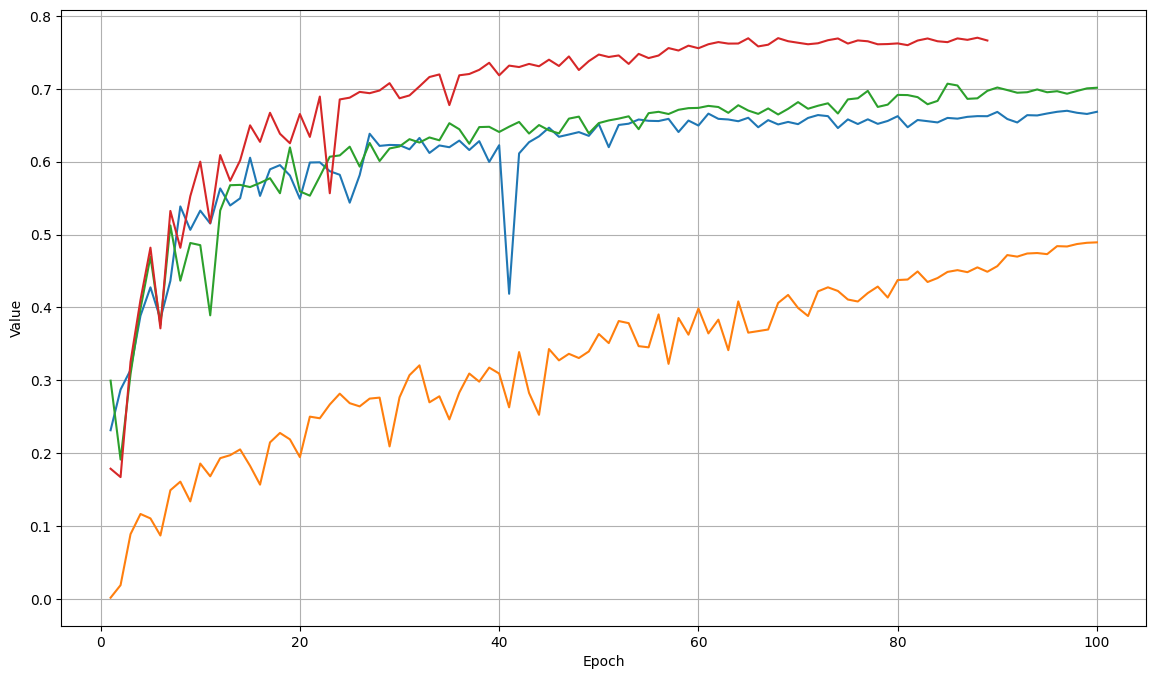

In [41]:
# Plotting the data
plt.figure(figsize=(14, 8))

# Plot each trial
for column in df.columns[1:]:  # Skip the first column which is 'epoch'
    plt.plot(df['epoch'], df[column], label=column)

# Adding titles and labels
plt.xlabel('Epoch')
plt.ylabel('Value')
# plt.legend()

plt.grid(True)
plt.show();


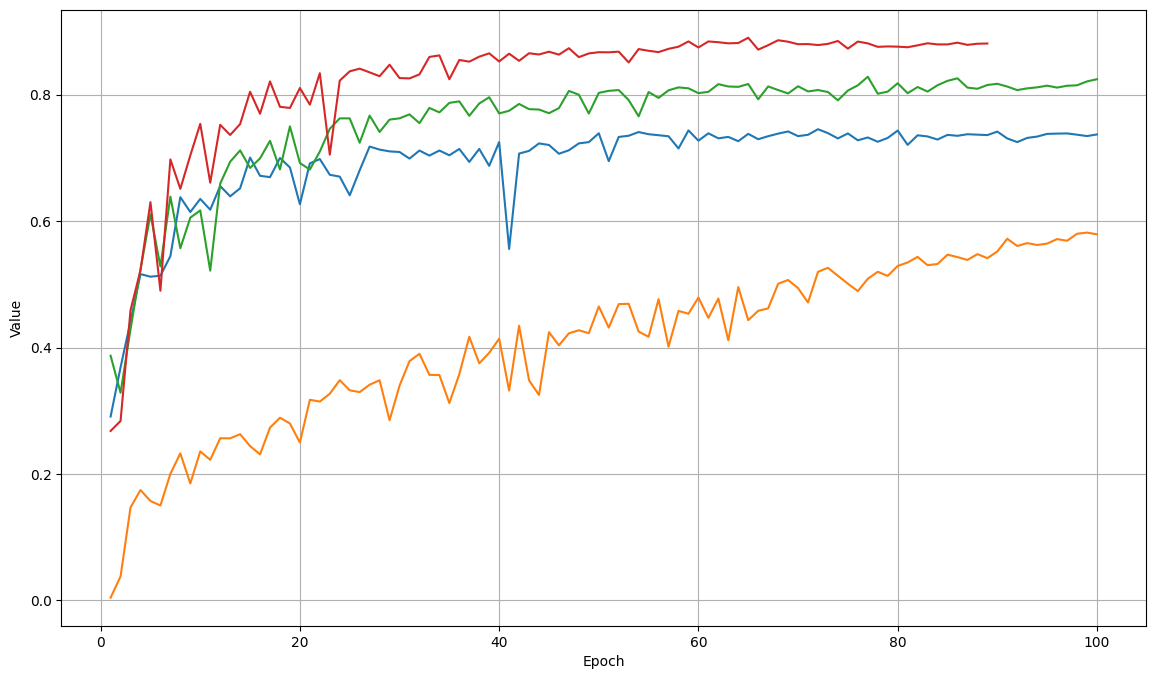

In [43]:
# mAP50
# Plotting the data
plt.figure(figsize=(14, 8))

# Plot each trial
for column in df1.columns[1:]:  # Skip the first column which is 'epoch'
    plt.plot(df1['epoch'], df1[column], label=column)

# Adding titles and labels
plt.xlabel('Epoch')
plt.ylabel('Value')
# plt.legend()

plt.grid(True)
plt.show();


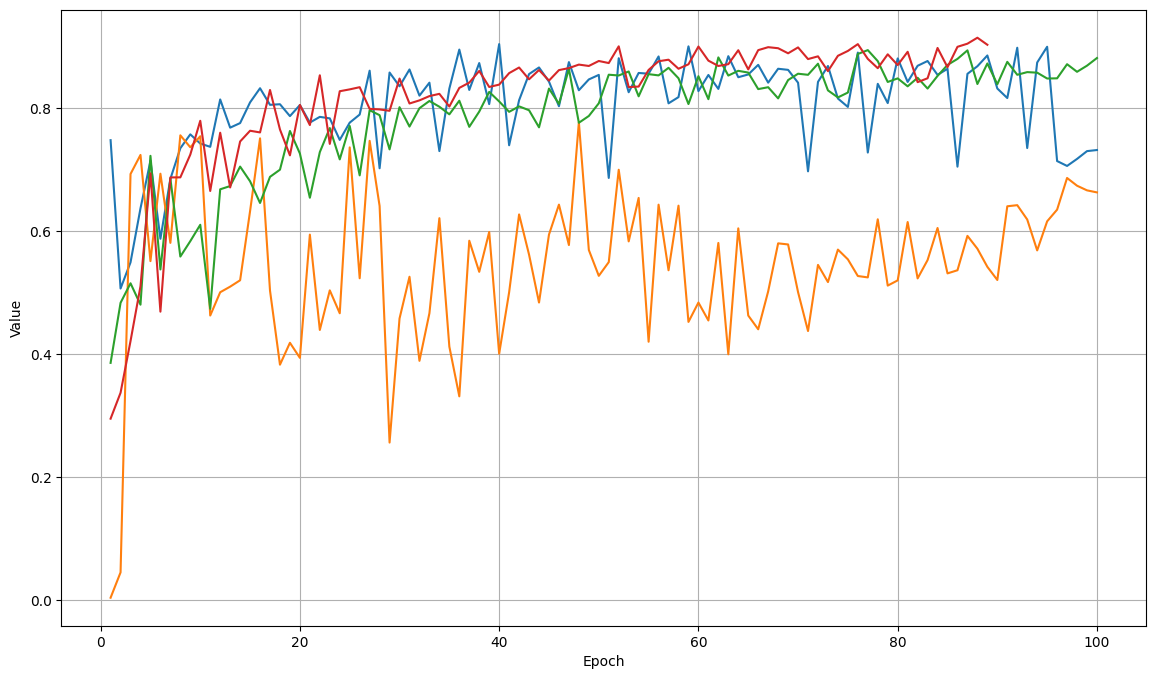

In [45]:
# Precision
# Plotting the data
plt.figure(figsize=(14, 8))

# Plot each trial
for column in df2.columns[1:]:  # Skip the first column which is 'epoch'
    plt.plot(df2['epoch'], df2[column], label=column)

# Adding titles and labels
plt.xlabel('Epoch')
plt.ylabel('Value')
# plt.legend()

plt.grid(True)
plt.show();


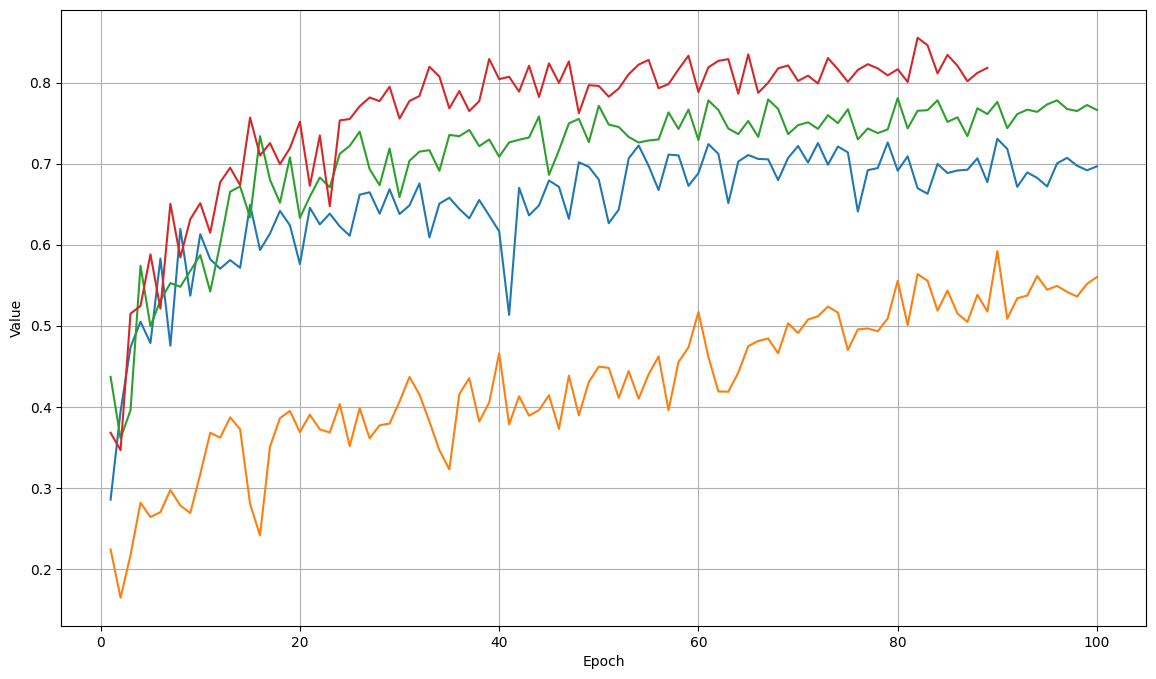

In [46]:
# Recall
# Plotting the data
plt.figure(figsize=(14, 8))

# Plot each trial
for column in df3.columns[1:]:  # Skip the first column which is 'epoch'
    plt.plot(df3['epoch'], df3[column], label=column)

# Adding titles and labels
plt.xlabel('Epoch')
plt.ylabel('Value')
# plt.legend()

plt.grid(True)
plt.show();


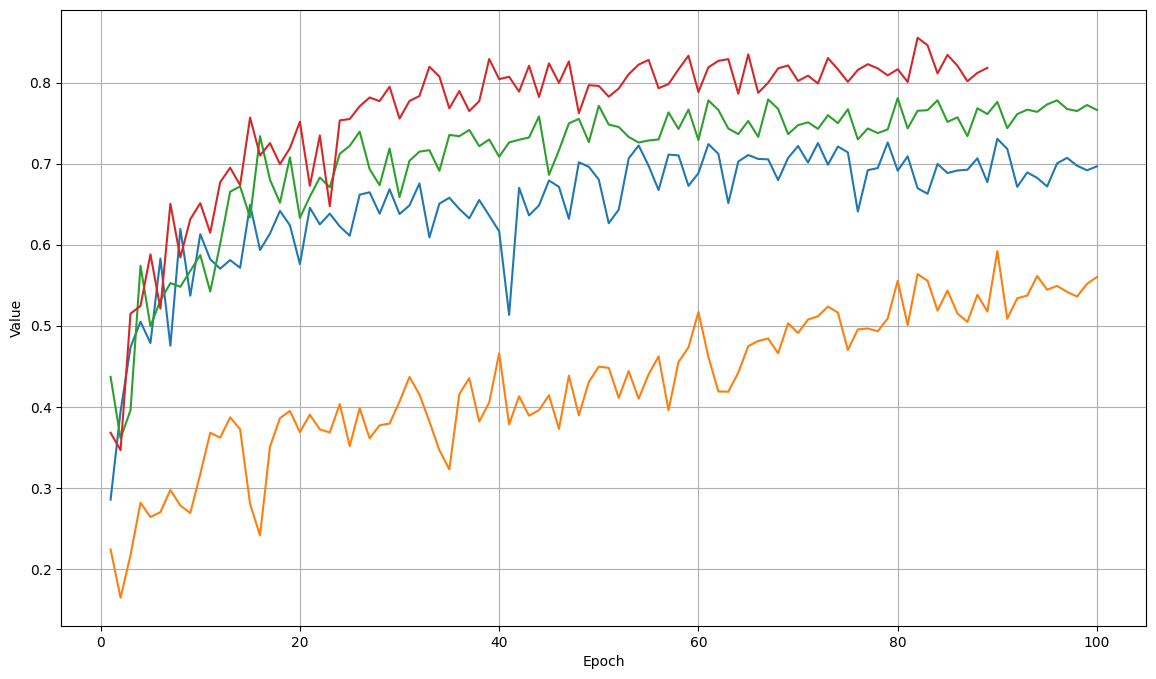

In [30]:
# Plotting the data
plt.figure(figsize=(14, 8))

# Plot each trial
for column in df3.columns[1:]:  # Skip the first column which is 'epoch'
    plt.plot(df3['epoch'], df3[column], label=column)

# Adding titles and labels
plt.xlabel('Epoch')
plt.ylabel('Value')
# plt.legend()

plt.grid(True)
plt.show();


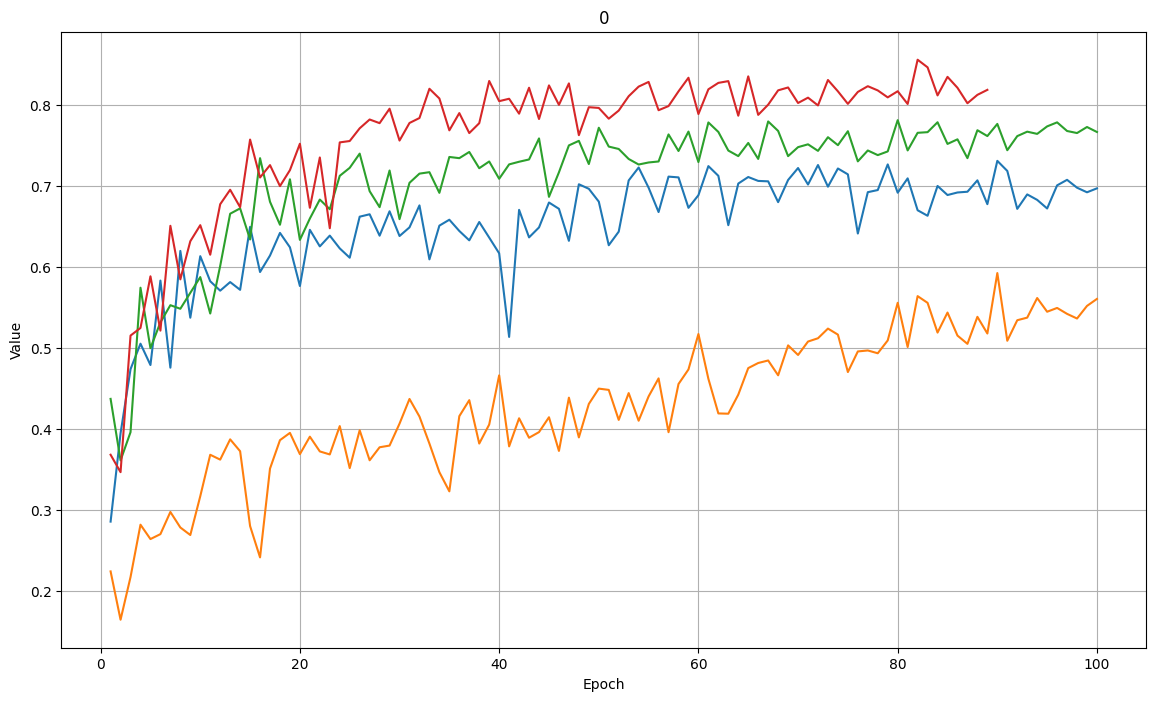

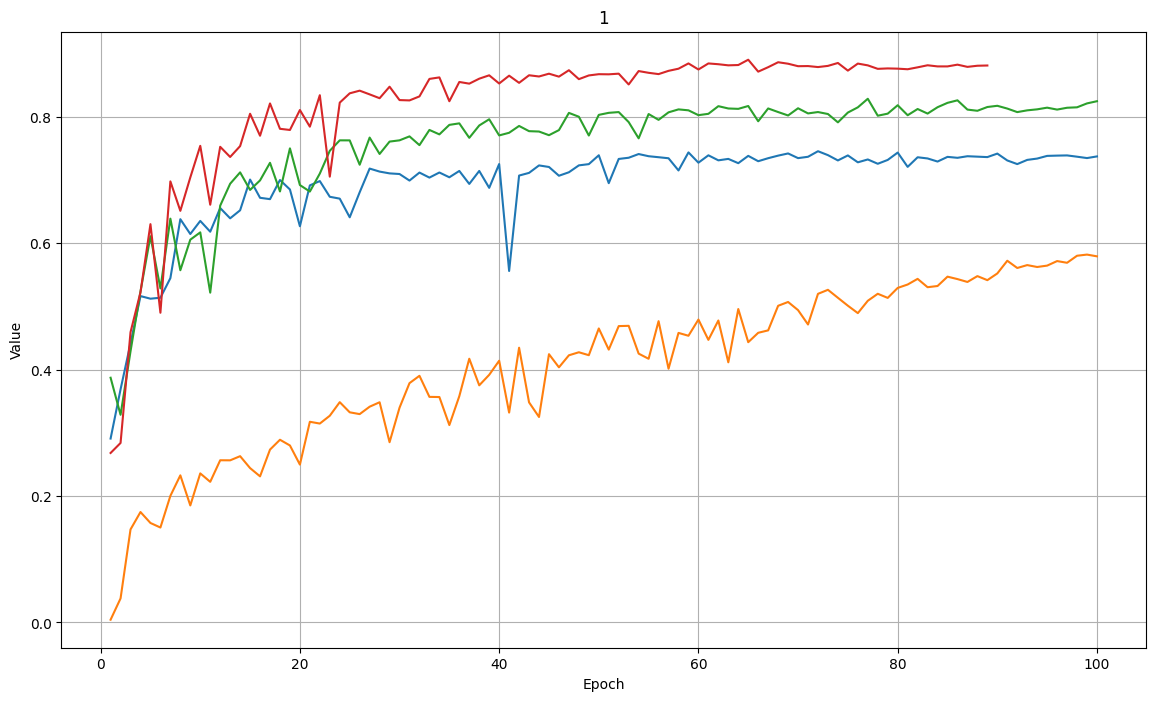

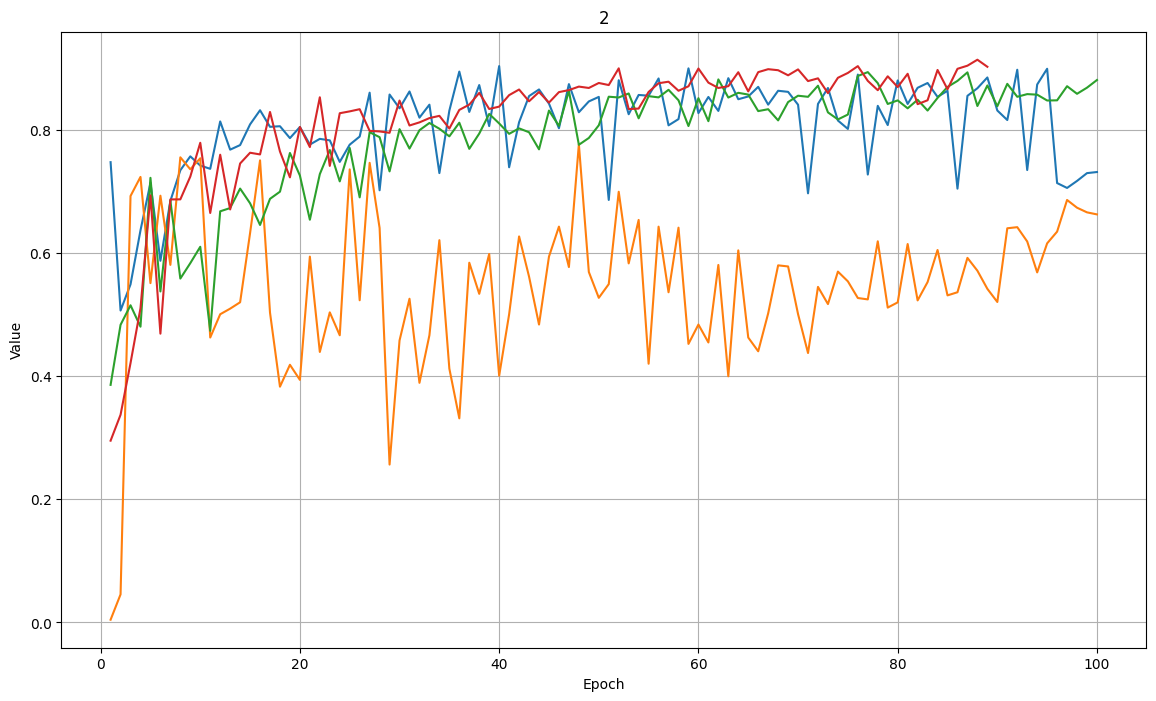

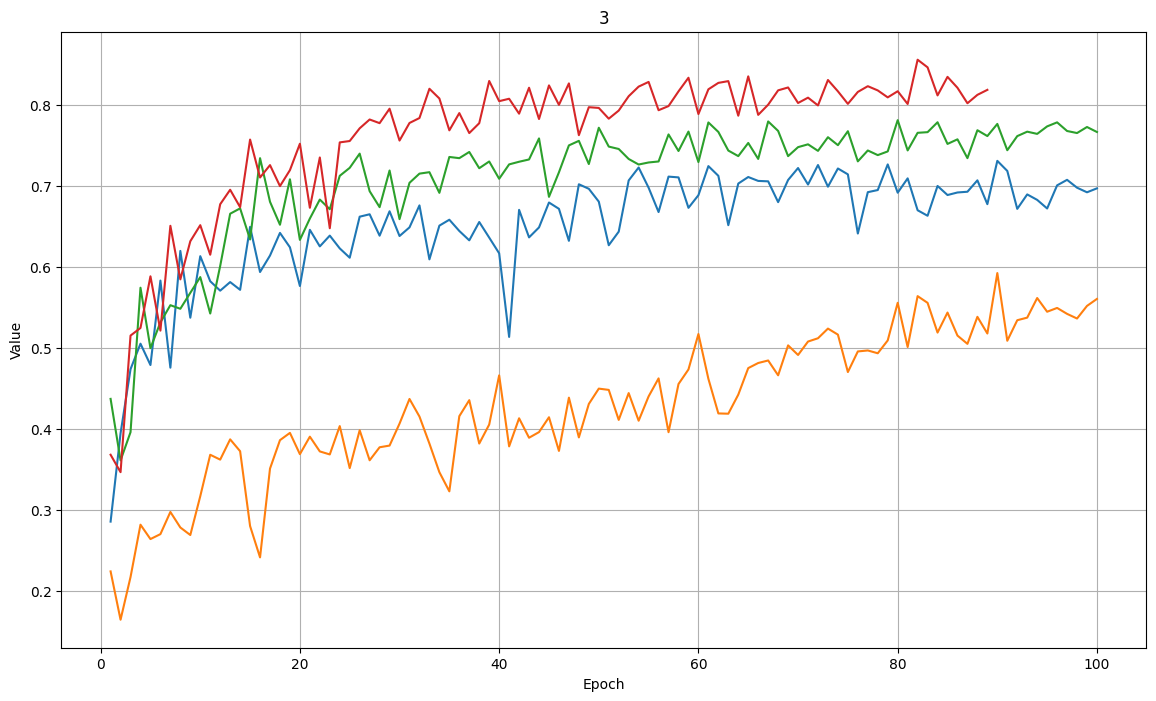

In [26]:
# 각 DataFrame에 대해 반복 실행
for i, df in enumerate([df, df1, df2, df3]):
    plt.figure(figsize=(14, 8))
    
    # Plot each trial
    for column in df.columns[1:]:  # 첫 번째 열 'epoch'는 제외
        plt.plot(df['epoch'], df[column], label=column)

    # Adding titles and labels
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title(i)
    # plt.legend()

    plt.grid(True)
    plt.show();